# Python Notebook for testing SliTraNet

### Main Issues encountered:
1. `decord` library is deprecated
2. SliTraNet incompatible with MacOS (cuda is used)

In [ ]:
# Import libraries
import torch
from matplotlib import pyplot as plt
from emily_helper_functions.video_reader import get_frames_as_tensor

## Replace `decord` Library

In [2]:
own = 'own_CS1010A_tut4_short_cropped'
video_path = f'../videos/test/{own}.mp4'
frames = get_frames_as_tensor(video_path, "MoviePy", 360, 640) # to keep 16:9 ratio: 360, 640
print(type(frames[0]))

Video default fps is 25.0
number of frames as tensors returned are 4566
<class 'torch.Tensor'>


# Using Open CV to read videos

8 mins is also 14603 frames, and can apply torch.as_tensor() on frame to convert to tensor

# Show results

In [4]:
trim1, trim2, trim3 = 'trimmed_vid_lec_03', 'next_6mins_lec03', 'last_half_lec03'
full03, full06, own, own2 = 'lec03', 'lec06', 'own_CS1010A_tut4_short', 'own_cs1010a_with_vid'
own_tut_4_cropped = 'own_CS1010A_tut4_short_cropped'
def generate_frame_array(vid_name, result_type):
    video_frame_start, video_frame_end, static_slide_start, static_slide_end = [], [], [], []
    video_start_end, slide_start_end = [], []
    # Slide/Video Detection
    if result_type == 'slide_vid':
        file_results = open(f'results/test/resnet18_gray/{vid_name}_results.txt', 'r')
        
    else: # transition detection
        file_results = open(f'results/test/SliTraNet-gray-RGB/{vid_name}_transitions.txt', 'r')

    Lines = file_results.readlines()

    count = 0

    # Strips the newline character
    for line in Lines:
        if count == 0:
            count += 1
            pass
        else:
            count += 1
            res = list(map(lambda x: int(x.strip()), line.split(',')))

            if result_type == 'transition':
                video_frame_start.append(res[1])
                video_frame_end.append(res[2])
                video_start_end.extend((res[1], res[2]))
            
            elif result_type == 'slide_vid': 
                if res[0] == -1: # video frame
                    video_frame_start.append(res[1])
                    video_frame_end.append(res[2])
                    video_start_end.extend((res[1], res[2]))
                else:
                    static_slide_start.append(res[1])
                    static_slide_end.append(res[2])
                    slide_start_end.extend((res[1], res[2]))

    return video_frame_start, video_frame_end, static_slide_start, static_slide_end, video_start_end, slide_start_end

In [31]:
video_frame_start_pred, video_frame_end_pred, static_slide_start_pred, static_slide_end_pred, video_start_end_pred, slide_start_end_pred\
      = generate_frame_array(own_tut_4_cropped, result_type = 'transition')

In [35]:
video_frame_start, video_frame_end, static_slide_start, static_slide_end, video_start_end, slide_start_end\
      = generate_frame_array('own_CS1010A_tut_actual', result_type = 'slide_vid')

In [38]:
predicted = video_start_end_pred[:58] #static_slide_end_pred[:29] # 
actual = slide_start_end

tp, fp, fn = 0,0,0
for res in predicted: 
    if res in actual:
        tp += 1
    elif res not in actual:
        fp += 1

for res in actual:
    if res not in predicted:
        fn += 1

In [39]:
print(tp, fp, fn) # static slide end

6 52 10


In [42]:
print(tp, fp, fn) # static slide start 

5 23 3


In [18]:
import numpy as np
data_matrix = np.array([slide_start_end, slide_start_end_pred])

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data_matrix)
print(correlation_matrix)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

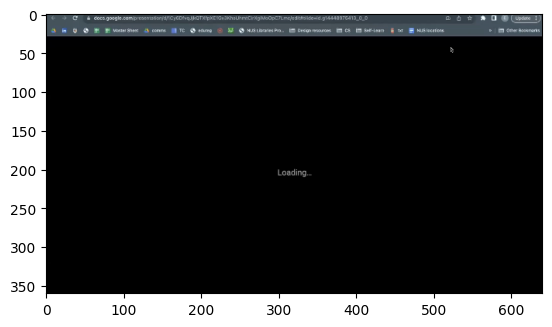

In [218]:
plt.imshow(frames[565])

In [91]:
(len(frames), len(static_slide_start_pred), len(slide_start_end_pred), len(video_frame_end_pred), len(video_start_end_pred)) #, 150 static slides

(4566, 0, 0, 47, 94)

In [184]:
torch.mean(torch.mean(abs(frames[13] - frames[12]), dim=(1,2), dtype=torch.float32))

tensor(179.5163)

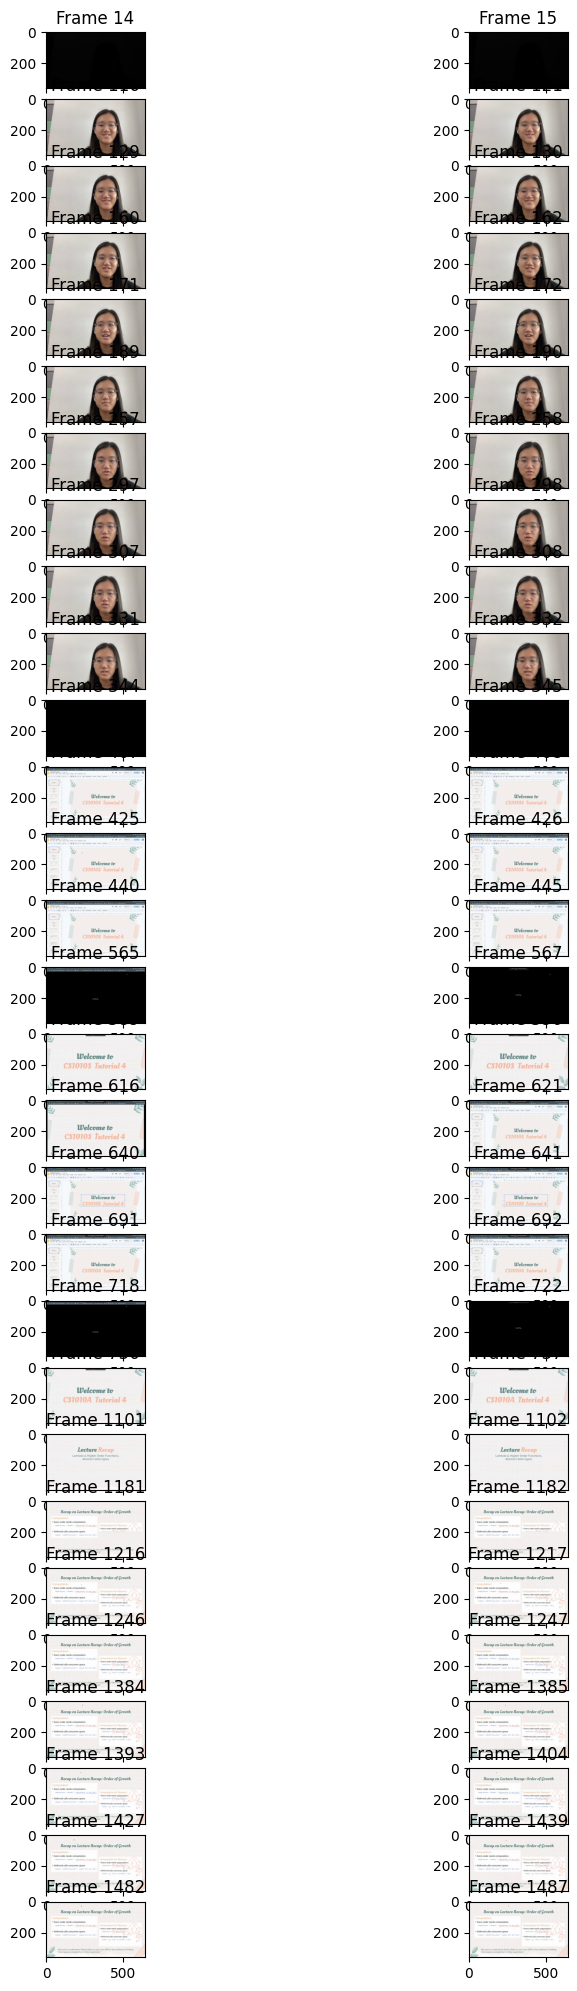

In [40]:
N = len( video_start_end_pred[:58])
fig, axes = plt.subplots((N//2),2, figsize=(10,25))
for i,ax in enumerate(axes.flat):
    ax.imshow(frames[video_start_end_pred[i]-1])
    ax.title.set_text(f'Frame {video_start_end_pred[i]-1}')

plt.show()

IndexError: list index out of range

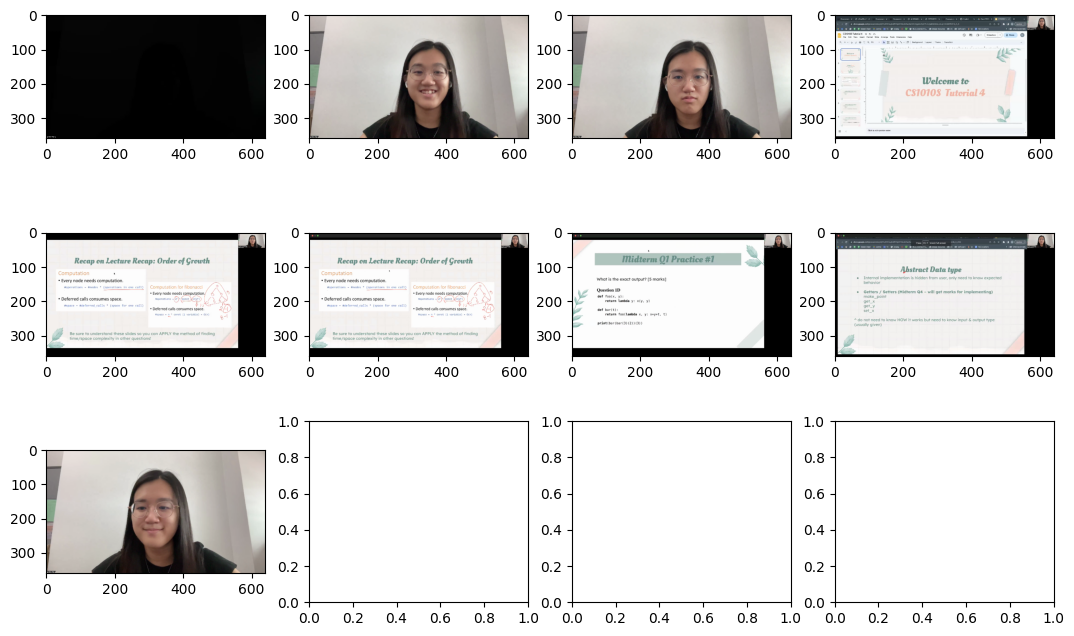

In [58]:
'''N = len(video_frame_start)
fig, axes = plt.subplots((N//4)+1,4, figsize=(13,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(frames[video_frame_start[i]-1])
plt.show()'''

generate_subplots(video_frame_start, columns=4, image_height=2):

In [10]:
file_results = open('results/test/resnet18_gray/own_cs1010a_with_vid_all_pred_results.txt', 'r')

Lines = file_results.readlines()

lst = eval(Lines[0])
print(len(lst))

10550


In [128]:
new_start_slide = []
for ind, val in enumerate(lst):
    if val < 0.1:
        new_start_slide.append(ind)

print(len(new_start_slide))
new_start_slide

847


[13,
 100,
 491,
 567,
 572,
 573,
 574,
 576,
 579,
 671,
 692,
 697,
 703,
 710,
 717,
 725,
 733,
 741,
 748,
 759,
 769,
 781,
 795,
 807,
 821,
 833,
 843,
 851,
 857,
 863,
 869,
 875,
 882,
 888,
 894,
 901,
 907,
 914,
 922,
 928,
 934,
 940,
 955,
 960,
 965,
 971,
 976,
 982,
 997,
 1003,
 1008,
 1012,
 1016,
 1020,
 1023,
 1027,
 1033,
 1037,
 1041,
 1046,
 1050,
 1055,
 1058,
 1062,
 1064,
 1066,
 1068,
 1069,
 1070,
 1072,
 1073,
 1074,
 1075,
 1077,
 1078,
 1080,
 1082,
 1083,
 1084,
 1085,
 1087,
 1093,
 1095,
 1097,
 1099,
 1101,
 1103,
 1104,
 1105,
 1106,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1117,
 1118,
 1119,
 1120,
 1126,
 1132,
 1138,
 1144,
 1150,
 1156,
 1162,
 1167,
 1173,
 1178,
 1184,
 1189,
 1202,
 1215,
 1228,
 1239,
 1250,
 1258,
 1264,
 1279,
 1285,
 1289,
 1293,
 1296,
 1300,
 1304,
 1309,
 1315,
 1319,
 1323,
 1327,
 1332,
 1345,
 1350,
 1355,
 1362,
 1368,
 1374,
 1380,
 1385,
 1391,
 1396,
 1403,
 1404,
 1409,
 1556,
 1600,
 1602,
 1603,


In [62]:
n = [i for i in lst if i < 0.1]

In [63]:
len(n)

118

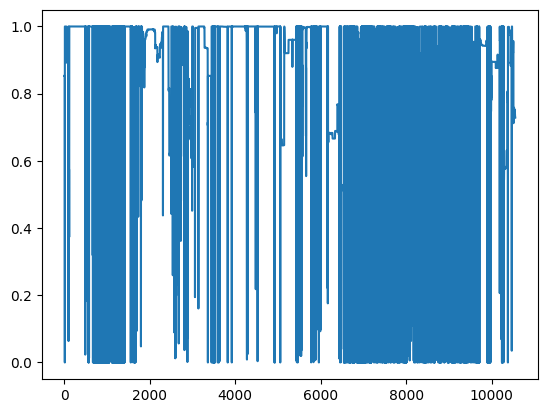

In [11]:
plt.plot(lst)

In [135]:
print("new test result at 1 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

new test result at 2 fps
video_frame_start indexes [25, 56, 139, 181]
video_frame_end indexes [26, 58, 141, 183]


In [114]:
print("old test result at 2 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

old test result at 2 fps
video_frame_start indexes [28, 49, 70, 89, 110, 161, 276, 307, 360, 625]
video_frame_end indexes [30, 50, 73, 90, 114, 162, 280, 308, 363, 626]


In [285]:
print("result at 1 fps")
print("video_frame_start indexes", video_frame_start)
print("video_frame_end indexes", video_frame_end)

result at 1 fps
video_frame_start indexes [1, 30, 99, 147, 204, 231, 292, 462, 579, 1184, 1301, 1370, 1443, 1615, 1651, 1697, 2113]
video_frame_end indexes [25, 60, 121, 164, 217, 250, 310, 490, 591, 1198, 1351, 1384, 1469, 1631, 1664, 1731, 2134]


In [ ]:
N = len(video_frame_start) * 4
fig, axes = plt.subplots(round(N//4),4, figsize=(13,len(video_frame_start)*2))
for row in range(N):
    for col in range(4):
        indx = (video_frame_start[row])-2+col # start at the frame before transition detected
        axes[row, col].imshow(array_of_frames[indx])
plt.show()

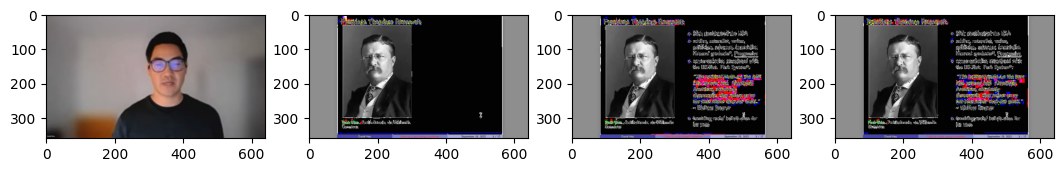

In [134]:
N = len(video_frame_end)
fig, axes = plt.subplots(round(N//4),4, figsize=(13,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(lst_8min[video_frame_end[i]]+5)
plt.show()

In [120]:
import numpy as np
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_static_slide_5_361.jpg', np.array(lst_8min[360]))

True

In [ ]:
# to write array to jpg and display
cap.set(cv2.CAP_PROP_POS_FRAMES, 64355)
ret, frame = cap.read()
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_frame_49.jpg', frame)

True

# Using MoviePy

In [ ]:
import torch
import torchvision.transforms as transforms
from moviepy.editor import VideoFileClip

# Create a VideoFileClip object from the input video
video_clip = VideoFileClip(video_path_30min) # returns video.io VideoFileClip # 30 fps
print(video_clip.fps)
frame_as_tensor = []
for frame in video_clip.iter_frames(fps=10):  # instead of video_clip.fps
    frame_as_tensor.append(torch.as_tensor(frame))

30.0


In [ ]:
frame_as_tensor_3fps = []
for frame in video_clip.iter_frames(fps=3):
    frame_as_tensor_3fps.append(torch.as_tensor(frame))

# Pytorch changing width & height

In [ ]:

# Desired width and height
desired_width = 640
desired_height = 480
# Resize each frame to the desired dimensions
resized_frames = [F.interpolate(frame.permute(2, 0, 1).unsqueeze(0), size=(desired_height, desired_width), mode="bilinear", align_corners=False).squeeze(0).permute(1, 2, 0) for frame in frames]


# Mouse tracking

In [44]:
import cv2

cap = cv2.VideoCapture(f'../videos/test/{own2}.mp4') # distorts colour

# Example for color-based cursor detection using OpenCV
lower_cursor_color = (0, 100, 100)
upper_cursor_color = (20, 255, 255)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_frame, lower_cursor_color, upper_cursor_color)
    # Apply morphological operations or noise reduction techniques if needed

    # Find contours and centroid of the cursor
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        cursor_contour = max(contours, key=cv2.contourArea)
        cursor_x, cursor_y = tuple(cursor_contour[0][0])
        # You now have the cursor's position (cursor_x, cursor_y)


In [45]:
cursor_x, cursor_y

(919, 661)

In [125]:
#cap = cv2.VideoCapture(f'../videos/test/{own2}.mp4')

ret, frame = cap.read()

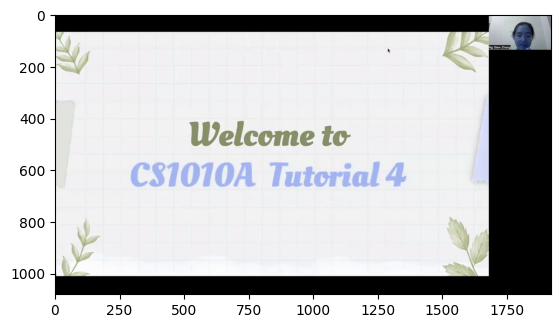

In [127]:
plt.imshow(frame)

In [38]:
# Initialize the tracker
tracker = cv2.TrackerCSRT_create()  # You can try other trackers as well

# Define a bounding box around the cursor (initial frame)
cursor_bbox = (cursor_x, cursor_y, cursor_x+7, cursor_y+10)
tracker.init(frame, cursor_bbox)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update the tracker
    success, cursor_bbox = tracker.update(frame)

    if success:
        cursor_x, cursor_y, cursor_width, cursor_height = map(int, cursor_bbox)
        # You now have the updated cursor's position (cursor_x, cursor_y)


error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
